In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import os
import pprint
from collections import Counter
import joblib
from pprint import pprint
import cv2


from skimage.io import imread
from skimage.transform import resize

from skimage.transform import rescale


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
Categories=['NORMAL','PNEUMONIA']

In [3]:
datadir="/kaggle/input/balanced-chest-xray/balanced/train"
datadir2="/kaggle/input/balanced-chest-xray/balanced/test"

In [4]:
def load_image(datadir, Categories):

    flat_data_arr=[]
    target_arr=[]

    for i in Categories:

        print(f'loading... category : {i}')
        path=os.path.join(datadir,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(128,128,3))
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(i))
        print(f'loaded category:{i} successfully')

    flat_data=np.array(flat_data_arr)
    target=np.array(target_arr)

    df=pd.DataFrame(flat_data)
    df['Target']=target

    x=df.iloc[:,:-1]
    y=df.iloc[:,-1]
    return x, y

In [5]:
X_train, y_train = load_image(datadir, Categories)

loading... category : NORMAL
loaded category:NORMAL successfully
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully


In [6]:
X_test, y_test = load_image(datadir2, Categories)

loading... category : NORMAL
loaded category:NORMAL successfully
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully


In [7]:
model=RandomForestClassifier()

In [8]:
import time
def _time(start, end): 
    # if in seconds 
    if (end-start)<60: 
        wall_time = f'{round((end-start),2)}sec'
    # if in minute(s)  
    elif (end-start)>=3600: 
        wall_time = f'{int((end-start)/3600)}h {int(((end-start)%3600)/60)}min {round((end-start)%60,2)}sec'
    # if in houre(s)  
    else: 
        wall_time = f'{int((end-start)/60)}min {round((end-start)%60,2)}sec'
    return wall_time

In [9]:
start = time.time()
model.fit(X_train, y_train)
print(_time(start, time.time()))

3min 57.35sec


In [10]:
y_pred=model.predict(X_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0
 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1
 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1
 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 

In [11]:
print(classification_report(y_test, y_pred, target_names=Categories))

              precision    recall  f1-score   support

      NORMAL       0.95      0.53      0.68       234
   PNEUMONIA       0.78      0.98      0.87       390

    accuracy                           0.81       624
   macro avg       0.86      0.75      0.77       624
weighted avg       0.84      0.81      0.80       624



In [12]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    roc_auc_score, roc_curve,
    precision_score,
    recall_score
)

In [13]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Precision: 0.8394
Recall: 0.8109
F1-score: 0.7950


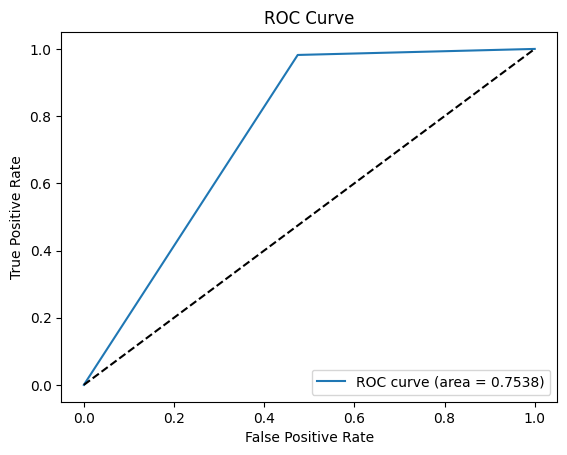

ROC-AUC Score: 0.7538


In [14]:
# Compute ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"ROC-AUC Score: {roc_auc:.4f}")